In [57]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [58]:
%matplotlib inline

In [59]:
con_dist = pd.read_csv("data_sources/condom_dist_u.csv", 
                       index_col = "Community Area Name")
mgon = pd.read_csv("data_sources/gonorrhea_males.csv", 
                   index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [60]:
#group condom distribution sites csv file by community area
con_dist_group = con_dist.groupby(["Community Area Name"]).count() 

#get rid of all blank rows
con_dist_group.dropna(inplace = True) 

#rename # of condom centers column to be more clear
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) 


In [61]:
con_mgon_merged = con_dist_group.join(mgon) #merge condom distribution centers and male gonorrhea datasets
con_mgon_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_mgon_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_mgon_merged.rename(columns = {"Cases 2013 Male 15-44" : "Cases_2013_Male"}, inplace = True)
con_mgon_merged.rename(columns = {"Cases 2014 Male 15-44" : "Cases_2014_Male"}, inplace = True)


con_mgon_merged = con_mgon_merged[['Number_of_Condom_Centers',
                                    "Incidence_Rate_2013",
                                    "Cases_2013_Male",
                                    "Incidence_Rate_2014",
                                    "Cases_2014_Male"]]
con_mgon_merged['Cases_2014_Male'] = con_mgon_merged['Cases_2014_Male'].replace("<5", 0)
con_mgon_merged['Cases_2014_Male'] = con_mgon_merged['Cases_2014_Male'].fillna(0)

con_mgon_merged['Cases_2014_Male'] = con_mgon_merged['Cases_2014_Male'].astype(float)

con_mgon_merged.dtypes

Number_of_Condom_Centers      int64
Incidence_Rate_2013         float64
Cases_2013_Male             float64
Incidence_Rate_2014         float64
Cases_2014_Male             float64
dtype: object

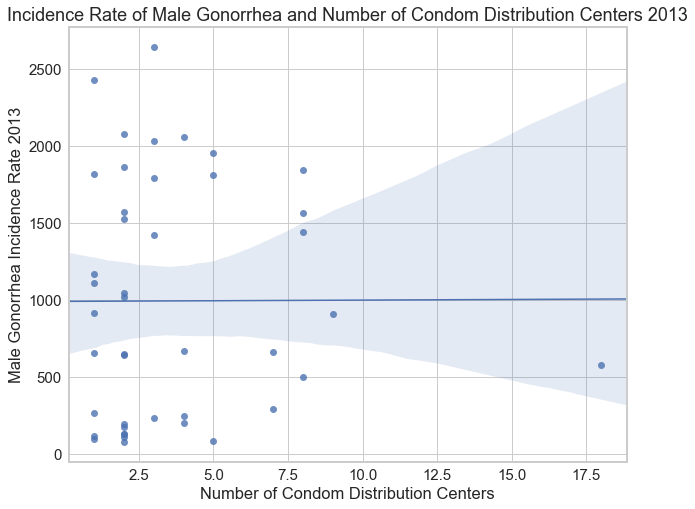

In [62]:
sns.set_style("whitegrid", 
              rc={'axes.linewidth': 2}
             ) #create graph space with seaborn
sns.set_context('notebook', 
                font_scale=1.5, 
                rc={"lines.linewidth": 1, 
                    "figure.figsize" : (10, 8)
                   }
               ) #set up line width and figure size
graph19 = sns.regplot(x = "Number_of_Condom_Centers", 
                      y = "Incidence_Rate_2013", 
                      data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph19.set_ylabel("Male Gonorrhea Incidence Rate 2013") #fix y axis label

graph19.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph19.set_title("Incidence Rate of Male Gonorrhea and Number of Condom Distribution Centers 2013") # add label


In [63]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.024
Method:                  Least Squares   F-statistic:                 0.0005144
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.982
Time:                         13:09:00   Log-Likelihood:                -346.04
No. Observations:                   43   AIC:                             696.1
Df Residuals:                       41   BIC:                             699.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  992.1829    178.356      5.563      0.000     631.985    1352.381
Number_of_Condom_Centers     0.8355     36.838      0.023      0.982     -73.560      75.231
==============================================================================
Omnibus:                        8.704   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.392
Skew:                           0.385   Prob(JB):                        0.183
Kurtosis:                       1.860   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

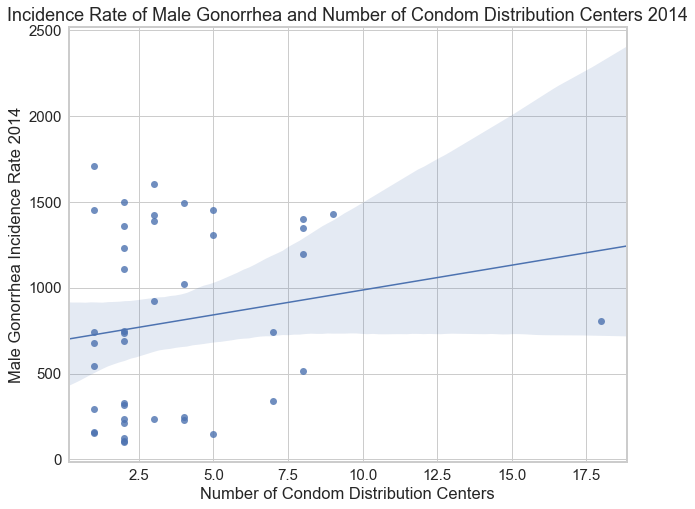

In [64]:
graph20 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2014", data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph20.set_ylabel("Male Gonorrhea Incidence Rate 2014") #fix y axis label

graph20.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph20.set_title("Incidence Rate of Male Gonorrhea and Number of Condom Distribution Centers 2014") # add label


In [65]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     1.303
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.261
Time:                         13:09:01   Log-Likelihood:                -321.95
No. Observations:                   42   AIC:                             647.9
Df Residuals:                       40   BIC:                             651.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  697.0430    124.198      5.612      0.000     446.029     948.057
Number_of_Condom_Centers    28.9477     25.364      1.141      0.261     -22.316      80.211
==============================================================================
Omnibus:                       22.174   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.849
Skew:                           0.205   Prob(JB):                        0.146
Kurtosis:                       1.575   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

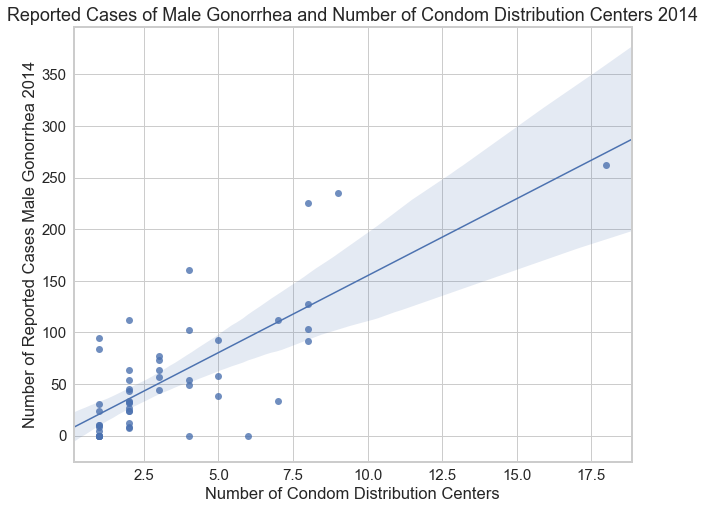

In [66]:
graph21 = sns.regplot(x = "Number_of_Condom_Centers", y = "Cases_2014_Male", data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph21.set_ylabel("Number of Reported Cases Male Gonorrhea 2014") #fix y axis label

graph21.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph21.set_title("Reported Cases of Male Gonorrhea and Number of Condom Distribution Centers 2014") # add label


In [67]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     1.303
Date:                 Thu, 30 Nov 2017   Prob (F-statistic):              0.261
Time:                         13:09:02   Log-Likelihood:                -321.95
No. Observations:                   42   AIC:                             647.9
Df Residuals:                       40   BIC:                             651.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  697.0430    124.198      5.612      0.000     446.029     948.057
Number_of_Condom_Centers    28.9477     25.364      1.141      0.261     -22.316      80.211
==============================================================================
Omnibus:                       22.174   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.849
Skew:                           0.205   Prob(JB):                        0.146
Kurtosis:                       1.575   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

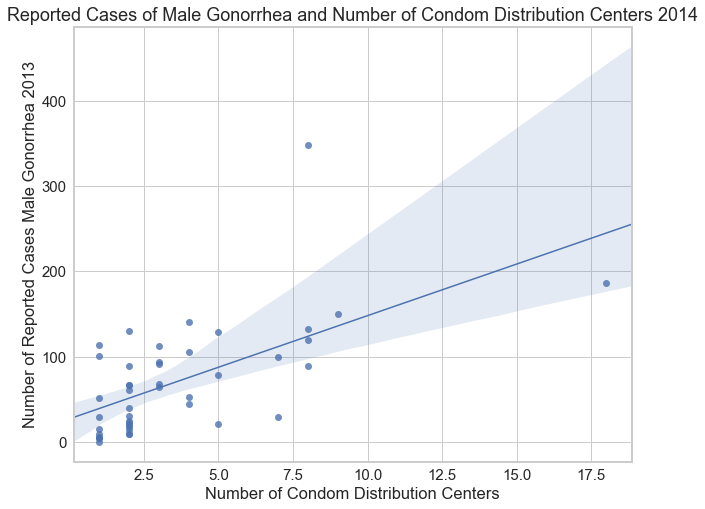

In [68]:
graph22 = sns.regplot(x = "Number_of_Condom_Centers", y = "Cases_2013_Male", data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph22.set_ylabel("Number of Reported Cases Male Gonorrhea 2013") #fix y axis label

graph22.set_xlabel("Number of Condom Distribution Centers") #fix x axis label

graph22.set_title("Reported Cases of Male Gonorrhea and Number of Condom Distribution Centers 2014") # add label


In [69]:
ols = smf.ols(formula = "Cases_2013_Male ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Cases_2013_Male   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.24e-05
Time:                        13:09:02   Log-Likelihood:                -235.09
No. Observations:                  44   AIC:                             474.2
Df Residuals:                      42   BIC:                             477.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   27.1337     11.709      2.317      0.025       3.505      50.763
Number_of_Condom_Centers    12.1090      2.445      4.952      0.000       7.175      17.043
==============================================================================
Omnibus:                       34.863   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.596
Skew:                           1.981   Prob(JB):                     1.17e-23
Kurtosis:                       9.472   Cond. No.                         7.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
graph19.figure.savefig('graphs/graph19.png')
graph20.figure.savefig('graphs/graph20.png')
graph21.figure.savefig('graphs/graph21.png')
graph22.figure.savefig('graphs/graph22.png')